#Part 1:Missing Data

In [13]:
#code cell 1
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn.datasets


new_vals = pd.read_csv('/content/drive/MyDrive/Machine_Learning/HW_5/preprocessing_sample_data_missing_vals_new.csv', index_col =0)

print(new_vals.head())
print(new_vals.shape)

   weight_kg  overall_length_mm  variety  avg_rating
0        NaN         291.068237        1  216.921532
1   0.008966         178.648431        1  314.967587
2   0.003654                NaN        1  178.361162
3        NaN         130.146299        0  476.198690
4   0.005907                NaN        0  380.775044
(100, 4)


In [14]:
#Code cell 2
from sklearn.model_selection import train_test_split
np.random.seed(5)
new_vals_fit, new_vals_test = train_test_split(new_vals, test_size = 0.25)

#copy and make dropped test and fit (2)

new_vals_fit_copy = new_vals_fit.copy()
new_vals_test_copy = new_vals_test.copy()

dropped_fit = new_vals_fit_copy.dropna(how='any')
dropped_test = new_vals_test_copy.dropna(how='any')

print(dropped_fit.shape)
print(dropped_test.shape)
print(dropped_fit.head())
print(dropped_test.head())

(46, 4)
(12, 4)
    weight_kg  overall_length_mm  variety  avg_rating
13   0.003266         253.067572        2  256.973548
63   0.009301         281.997703        2  388.025027
55   0.004010          87.544094        1  195.644470
87   0.009689         201.827132        1  307.771032
64   0.008598         303.680776        2  339.202540
    weight_kg  overall_length_mm  variety  avg_rating
66   0.004888         237.357630        2  284.407527
32   0.007599         224.916461        0  471.383841
74   0.008361         195.308378        1  254.062708
23   0.004029         239.411897        2  282.613140
10   0.002646         237.286348        2  209.801121


###Code cell 2 discussion:
The fitting data lost 29 rows and the testing data lost 13 rows.

In [17]:
#code cell 3

print(new_vals_fit['variety'].unique())
print(dropped_fit['variety'].unique())
print(new_vals_test['variety'].unique())
print(dropped_test['variety'].unique())

#one hot encode (4)

new_vals_fit_onehot =pd.get_dummies(new_vals_fit, columns=['variety'])
dropped_fit_onehot =pd.get_dummies(dropped_fit, columns=['variety'])
new_vals_test_onehot =pd.get_dummies(new_vals_test, columns=['variety'])
dropped_test_onehot = pd.get_dummies(dropped_test, columns=['variety'])

[2 1 0]
[2 1 0]
[2 0 1]
[2 0 1]


In [18]:
#code cell 4

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

#features and targets (8)

fit_data_features_oh = new_vals_fit_onehot.drop('avg_rating', axis=1)
fit_data_y_oh = new_vals_fit_onehot['avg_rating']

fit_data_features_oh_dropped = dropped_fit_onehot.drop('avg_rating', axis=1)
fit_data_y__oh_dropped = dropped_fit_onehot['avg_rating']

test_data_features_oh = new_vals_test_onehot.drop('avg_rating', axis=1)
test_data_y_oh = new_vals_test_onehot['avg_rating']

test_data_features_oh_dropped = dropped_test_onehot.drop('avg_rating', axis=1)
test_data_y_oh_dropped = dropped_test_onehot['avg_rating']

#pipline with impute
pipeline_with_impute = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), Ridge(alpha=0.01))

#pipeline without impute
pipeline_no_impute = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), Ridge(alpha=0.01))


#fit/predict pipeline without impute

pipeline_no_impute.fit(fit_data_features_oh_dropped, fit_data_y__oh_dropped)
pipeline_no_impute_pred = pipeline_no_impute.predict(test_data_features_oh_dropped)
#use test_data_y_oh_dropped for scatter plot

#fit/predict pipeline with impute

pipeline_with_impute.fit(fit_data_features_oh, fit_data_y_oh)
pipeline_w_impute_pred = pipeline_with_impute.predict(test_data_features_oh)
#use test_data_y_oh for scatter plot


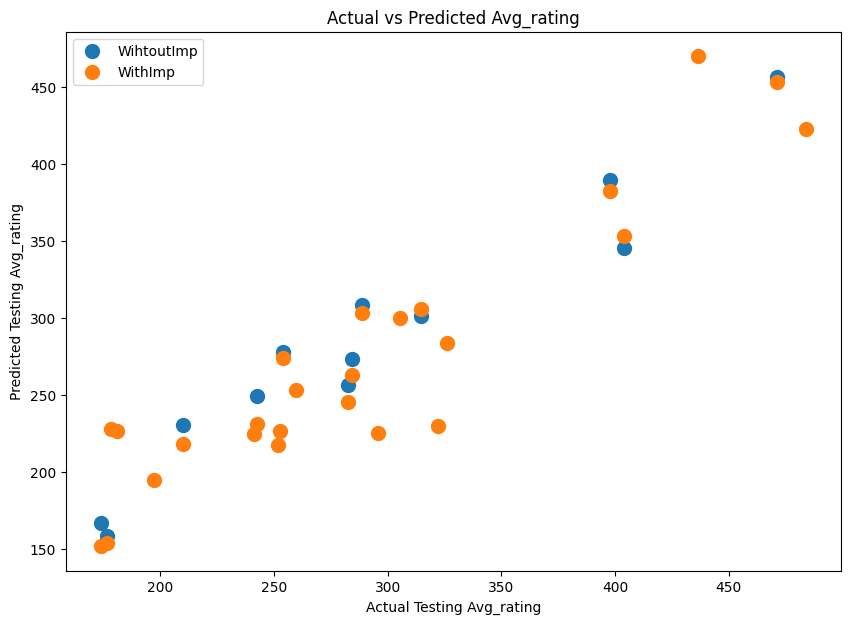

In [19]:
#code cell 5

figsize = (10, 7)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_data_y_oh_dropped, pipeline_no_impute_pred, s=100, label='WihtoutImp')
ax.scatter(test_data_y_oh, pipeline_w_impute_pred, s=100, label='WithImp')

ax.set_title('Actual vs Predicted Avg_rating')
ax.set_xlabel('Actual Testing Avg_rating')
ax.set_ylabel('Predicted Testing Avg_rating')

ax.legend()
plt.show()


###Code cell 5 discussion

From the graph you can see that the fits are pretty similar but the data with imputed values has more data points than the one without imputation. This is because the imputation fills in all the data points that have missing values with the median, so the model has more data to work with. However, the data with the missing values has a little bit more of a linear trend and has less scattered data points. This could be because it has less data, but it also could be that the imputed dataset is a little misleading. The median might not accurately represent the missing values and therefore might not be a great representation of what the relationship should actually look like. Overall though, I belief the fits to be pretty similar.

I think that there would be a large difference between these two fits is there was a lot of data missing or if there was large variability in the data. If there was a lot of data missing without imputation, the model would not really have enough information to make accurate predictions about the data. On the other end, if there is a large dataset that has a lot of variability, just replacing missing data with the median with imputation would be an oversimplification of the data. This might skew the prediction and might not show whole picture of the relationship between variables.

#Part 2: k-NN vs. mean imputer

In [20]:
#code cell 1
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn.datasets

alt_vals = pd.read_csv('/content/drive/MyDrive/Machine_Learning/HW_5/preprocessing_sample_data_missing_vals_alt.csv', index_col =0)


print(alt_vals.head())
print(new_vals.shape)

   weight_kg  overall_length_mm      price  avg_rating
0   3.143428           1.490927   2.895001    6.400798
1  10.237233           9.644184   9.635325   30.665897
2  10.547104          11.105189        NaN   36.543178
3  10.655396          10.214400        NaN   33.211331
4   9.180312                NaN  12.319402   30.861946
(100, 4)


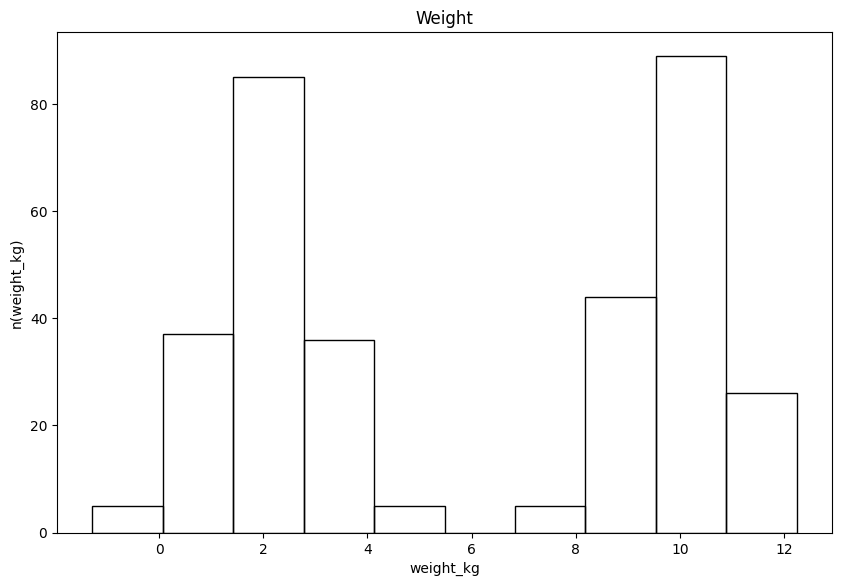

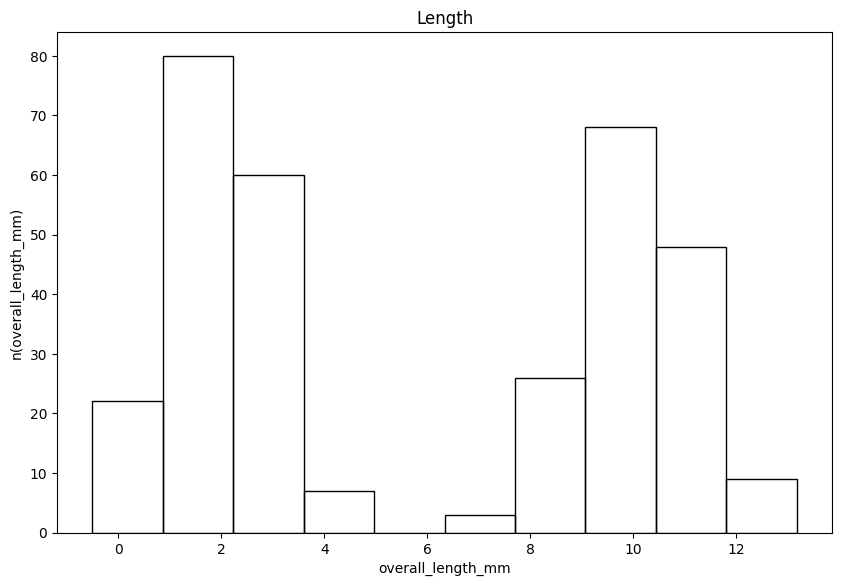

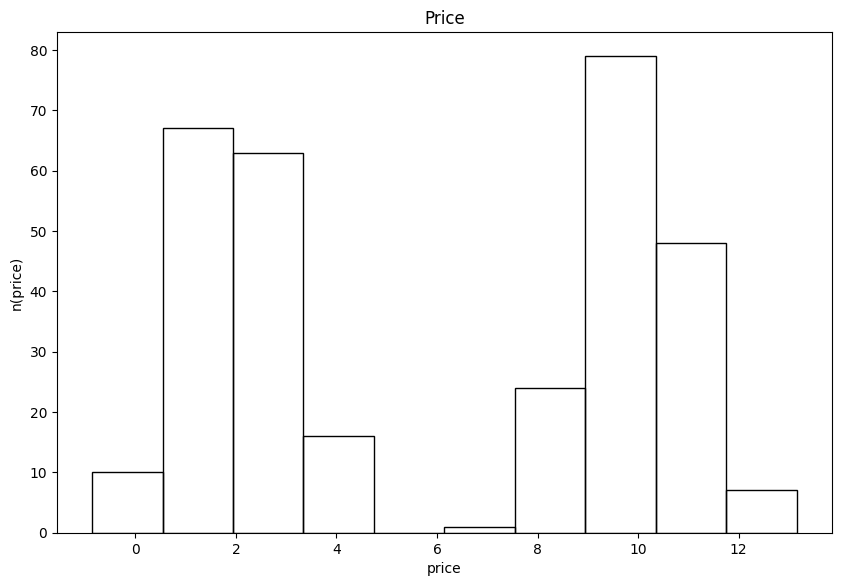

In [21]:
#code cell 2

figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.hist(alt_vals['weight_kg'], bins=10, fill=False)
ax.set_title('Weight')
ax.set_xlabel('weight_kg')
ax.set_ylabel('n(weight_kg)')
fig.show()

figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.hist(alt_vals['overall_length_mm'], bins=10, fill=False)
ax.set_title('Length')
ax.set_xlabel('overall_length_mm')
ax.set_ylabel('n(overall_length_mm)')
fig.show()

figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.hist(alt_vals['price'], bins=10, fill=False)
ax.set_title('Price')
ax.set_xlabel('price')
ax.set_ylabel('n(price)')
fig.show()

In [22]:
#code cell 3

from sklearn.model_selection import train_test_split
np.random.seed(5)
alt_vals_fit, alt_vals_test = train_test_split(alt_vals, test_size = 0.25)

In [23]:
#code cell 4
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.impute import KNNImputer

#features and targets for fitting and testing data

fit_data_features = alt_vals_fit.drop('avg_rating', axis=1)
fit_data_y = alt_vals_fit['avg_rating']

test_data_features = alt_vals_test.drop('avg_rating', axis=1)
test_data_y = alt_vals_test['avg_rating']

#pipelines

imp_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Ridge(alpha=0.01))

knn_pipeline = make_pipeline(KNNImputer(), StandardScaler(), Ridge(alpha=0.01))

#fitting pipelines

imp_pipeline.fit(fit_data_features, fit_data_y)

knn_pipeline.fit(fit_data_features, fit_data_y)

#predict pipeleines

imp_pipeline_pred = imp_pipeline.predict(test_data_features)

knn_pipeline_pred = knn_pipeline.predict(test_data_features)


Imputing pipeline score 0.8793927477274321
k-NN pipeline score 0.9300514180958818


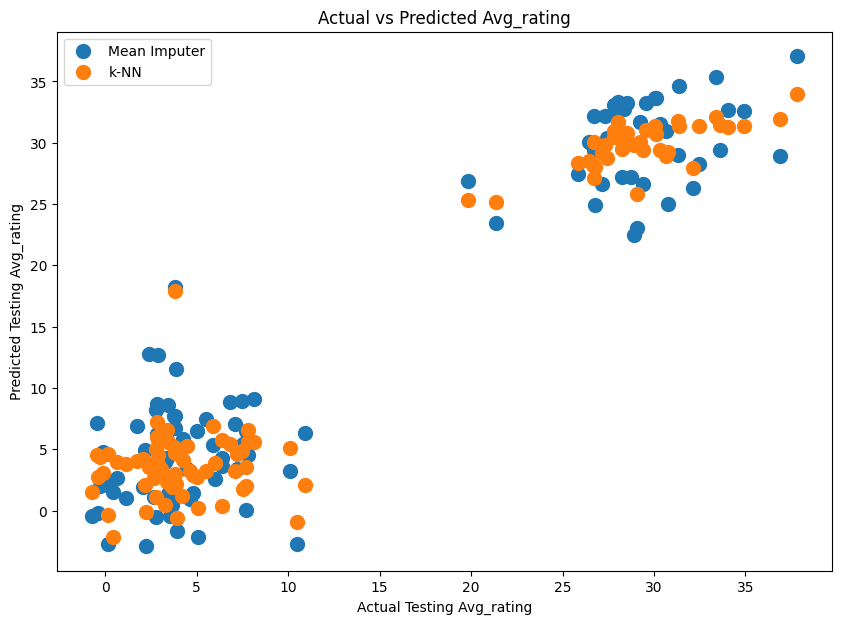

In [24]:
#code cell 5

#scores
imp_pipeline_score = imp_pipeline.score(test_data_features, test_data_y)
print('Imputing pipeline score', imp_pipeline_score)

knn_pipeline_score = knn_pipeline.score(test_data_features, test_data_y)
print('k-NN pipeline score', knn_pipeline_score)

figsize = (10, 7)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_data_y, imp_pipeline_pred, s=100, label='Mean Imputer')
ax.scatter(test_data_y, knn_pipeline_pred, s=100, label='k-NN')

ax.set_title('Actual vs Predicted Avg_rating')
ax.set_xlabel('Actual Testing Avg_rating')
ax.set_ylabel('Predicted Testing Avg_rating')

ax.legend()
plt.show()

###Code cell 5 Discussion

Based on the graph, both of these imputing strategies have similar fits for the data. They are both clustered at two areas of the graph, which is what we saw in the histograms. However, the k-NN imputation is more condensed and focused while the mean imputation is more spread out and generalized. This is because the k-NN imputation is taking the average of nearby data points to fill in the missing values as opposed to using the mean of the entire feature.

In this case, the k-NN imputation is better since we see with the histograms that our data does not follow a normal distribution. For each feature we have clusters of data on both ends of the graph. Using just the mean to fill in data points is a more generalzied approach so it might skew the data to a more normal distribution. Therefore, the k-NN approach is better for our data since it will be more specific to each area near the missing data and can more accurately represent the clustered areas of our data.